<a href="https://colab.research.google.com/github/gaurav7916/Telecom_Churn/blob/main/TELECOM_CHURN_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Case Study (Machine Learning)

### Problem Statement
### Business Problem Overview

In the highly competitive telecom industry, customers have the flexibility to switch between multiple service providers, leading to an annual churn rate of 15-25%. Since acquiring new customers costs 5-10 times more than retaining existing ones, customer retention has become more crucial than customer acquisition, especially for high-value customers. For incumbent telecom operators, reducing churn and retaining profitable customers is a top business priority. The goal of this case study is to predict which customers are at high risk of churn by analyzing customer-level data from a leading telecom firm. Additionally, we will identify key indicators of churn to help mitigate customer attrition.

### Definitions of Churn

Churn can be defined in multiple ways, such as:

1. **Revenue-Based Churn**: Customers who have not utilized any revenue-generating services (mobile internet, outgoing calls, SMS, etc.) over a specified period, or who generate less than a certain threshold of revenue (e.g., INR 4 per month). This definition has a shortcoming since some customers, such as those in rural areas, only receive calls but do not generate revenue themselves.
2. **Usage-Based Churn**: Customers who show no usage (incoming or outgoing calls, internet usage, etc.) over a specified period. However, this definition may be less useful if action is taken too late to retain the customer (e.g., after two months of zero usage).

For this case study, we will use the usage-based churn definition, focusing on high-value customers, who contribute about 80% of the total revenue in markets like India and Southeast Asia.

### Understanding the Customer Lifecycle in Churn:
Customer churn typically happens in phases:
1. **Good Phase**: Customer is satisfied and behaves normally.
2. **Action Phase**: Customer starts exhibiting dissatisfaction (e.g., after receiving a competitor's offer or experiencing poor service). Early identification during this phase is critical for retention.
3. **Churn Phase**: The customer has fully switched to a competitor.

In this case study, we will analyze data from a four-month period (June to September). The first two months represent the "good" phase, the third month is the "action" phase, and the fourth month is the "churn" phase. Churn prediction will be made using data from the first three months, while data from the fourth month (churn phase) will be used only for tagging and not for prediction.

### Objective
The primary objective of this case study is to predict churn for high-value customers based on usage data. Our goal is to:
1. Build a predictive churn model.
2. Identify the most important predictor variables for churn.
3. Predict churn based on the action period, i.e., excluding data from the churn period after labeling.

### Steps to Approach the Solution

The following are the steps to develop the best solution for this case study:

1. **Data Reading, Understanding, and Cleaning**:

--> Load the dataset and understand its structure.

--> Handle missing values through appropriate imputation.

2. **Filter High-Value Customers**:

--> Focus on high-value customers using a predefined metric for filtering.

3. **Derive Churn**:

--> Create the target variable (churn) using the usage-based definition.

4. **Data Preparation**:

--> Derive additional variables from the data.

--> Perform exploratory data analysis (EDA).

--> Split the data into training and test sets.

--> Apply scaling to normalize the data.

5. **Class Imbalance Handling and Dimensionality Reduction**:

--> Address any class imbalance in the dataset.

--> Reduce dimensionality using Principal Component Analysis (PCA) or similar techniques.

6. **Build and Evaluate Classification Models**:

--> Train multiple classification models to predict churn (e.g., logistic regression, decision trees, random forests, etc.).

--> Evaluate the performance of these models using appropriate metrics (e.g., accuracy, precision, recall, AUC-ROC).

--> Select the best model based on its performance in predicting churn for high-value customers.

7. **Model Summary**:

--> Provide a final summary to the company, highlighting the best model, the most important predictor variables, and actionable insights to reduce churn.


By following these steps, the telecom firm will be able to retain high-value customers more effectively, thereby minimizing revenue loss due to churn.

### IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
sns.set(style="darkgrid")

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA

In [ ]:
# Set environment settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

### READING THE DATASET

In [ ]:
#Reading the dataset
telecom_df = pd.read_csv('documents/telecom_churn_data.csv')
telecom_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [ ]:
#Displaying shape of the dataset
telecom_df.shape

(99999, 226)

### The dataset in this case study contains 99999 rows and 226 columns.

In [ ]:
#Displaying the information of the dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [ ]:
# Displaying description of the dataset
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Terminology used in Data dictionary:

In [ ]:
#Importing data dictionary file
telecom_df_dict = pd.read_excel("documents/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [ ]:
#Displaying dictionary items
telecom_df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Statistical Analysis of the Data:

In [ ]:
# Statistical analysis of the numercial features
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Checking for null values

In [ ]:
# Concatenating the Null Count, 'Null Percentage'

null_count = telecom_df.isnull().sum().sort_values(ascending = False)
null_percentage = telecom_df.isnull().mean() * 100
null_percentage = round(null_percentage, 2)
missing_info = pd.concat([null_count, null_percentage], axis=1)
missing_info.columns = ['Null Count', 'Null Percentage']
print(missing_info)

                          Null Count  Null Percentage
arpu_3g_6                      74846            74.85
night_pck_user_6               74846            74.85
total_rech_data_6              74846            74.85
arpu_2g_6                      74846            74.85
max_rech_data_6                74846            74.85
fb_user_6                      74846            74.85
av_rech_amt_data_6             74846            74.85
date_of_last_rech_data_6       74846            74.85
count_rech_2g_6                74846            74.85
count_rech_3g_6                74846            74.85
date_of_last_rech_data_7       74428            74.43
total_rech_data_7              74428            74.43
fb_user_7                      74428            74.43
max_rech_data_7                74428            74.43
night_pck_user_7               74428            74.43
count_rech_2g_7                74428            74.43
av_rech_amt_data_7             74428            74.43
arpu_2g_7                   

In [ ]:
telecom_df.shape

(99999, 226)

### Cleaning the Dataset

More than 74% of the values for the recharge-related data are missing.

In [ ]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can generate a new feature called total_rech_amt_data by combining total_rech_data and av_rech_amt_data to capture the amount spent by the customer on data. Since the minimum value is 1, we can impute the NA values with 0, assuming that this indicates no recharges were made by the customer.

In [ ]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
telecom_df.loc[telecom_df.total_rech_data_6.isnull() & telecom_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In the recharge variables where the minimum value is 1, we can fill in the missing values with zeros, as this indicates that the customer did not recharge their number during that month.

In [ ]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [ ]:
# impute missing values with 0
telecom_df[zero_impute] = telecom_df[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
telecom_df[zero_impute].isnull().sum()*100/telecom_df.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [ ]:
# now we can check the "statistics Summary"
telecom_df[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


### For columns having more than 70% null values we can drop those columns

In [ ]:
drop_cols = list(telecom_df.columns[telecom_df.isnull().mean()*100 > 70])
print("Number of columns we can drop due to 70% missing values:",len(drop_cols), '\n\n', drop_cols)

Number of columns we can drop due to 70% missing values: 28 

 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [ ]:
telecom_df = telecom_df.drop(drop_cols, axis=1)
telecom_df.shape

(99999, 198)

In [ ]:
# now we can create some column name list by there types using description of columns
id_cols = ['mobile_number','circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9']

num_cols = [column for column in telecom_df.columns if column not in id_cols + date_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols: %d\n#Numeric cols: %d" % (len(id_cols), len(date_cols), len(num_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) == telecom_df.shape[1])

#ID cols: 2
#Date cols: 8
#Numeric cols: 188
True


In [ ]:
# drop id and date columns
telecom_df = telecom_df.drop(id_cols + date_cols, axis=1)
#check the shape again
telecom_df.shape

(99999, 188)

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [ ]:
# rechecking the missing values for how many missing values has left
telecom_df.isnull().mean() * 100

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

### For numerical variables having missing values we can impute with median

In [ ]:
null_cols = telecom_df.columns[telecom_df.isnull().sum() > 0]
print("Number of remaining columns containing null values : ", len(null_cols), "\n")
print(null_cols)

Number of remaining columns containing null values :  119 

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)


In [ ]:
#imputing with meadian for num_cols
telecom_df[null_cols] = telecom_df[null_cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
#again checking for the missing values
telecom_df.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

In churn prediction, the customer lifecycle is typically divided into three phases:
1. The 'good' phase (Months 6 and 7)
2. The 'action' phase (Month 8)
3. The 'churn' phase (Month 9)
   
For a four-month window, the first two months represent the 'good' phase, the third month is the 'action' phase, and the fourth month is the 'churn' phase.

## Filtering high-value customers:

Here we can take the good phase ( it means month 6 and 7) data to get high value customers

In [ ]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df.total_rech_data_6 * telecom_df.av_rech_amt_data_6
telecom_df['total_data_rech_7'] = telecom_df.total_rech_data_7 * telecom_df.av_rech_amt_data_7

Adding total data recharge and total recharge to get total combined recharge amount for a month

In [ ]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_df['amt_data_6'] = telecom_df.total_rech_amt_6 + telecom_df.total_data_rech_6
telecom_df['amt_data_7'] = telecom_df.total_rech_amt_7 + telecom_df.total_data_rech_7

In [ ]:
# calculate average recharge done by customer in June and July
telecom_df['av_amt_data_6_7'] = (telecom_df.amt_data_6 + telecom_df.amt_data_7)/2

In [ ]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telecom_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [ ]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_df_filtered = telecom_df.loc[telecom_df.av_amt_data_6_7 >= telecom_df.av_amt_data_6_7.quantile(0.7), :]
telecom_df_filtered = telecom_df_filtered.reset_index(drop=True)

In [ ]:
telecom_df_filtered.shape

(30001, 193)

In [ ]:
# deleting the variables created to filter high-value customers
telecom_df_filtered = telecom_df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [ ]:
telecom_df_filtered.shape

(30001, 188)

At this point, we have 30,001 rows and 188 columns after filtering for customers whose recharge value is greater than or equal to that of the 70th percentile customer.

## Deriving Churn:

We are using 9 months of data (referred to as the 'churn' phase) to derive the target variable. In this case study, the target variable is not provided, so we need to create it from the churn phase data. To do this, we will use the attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9 to define the churn variable.

In [ ]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
telecom_df_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_df_filtered[telecom_df_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [ ]:
# Initializing the churn variable.
telecom_df_filtered['churn']=0

# Imputing the churn values based on the condition
telecom_df_filtered['churn'] = np.where(telecom_df_filtered[telecom_df_col].sum(axis=1) == 0, 1, 0)

In [ ]:
# Checking the top 10 data
telecom_df_filtered.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.00,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00

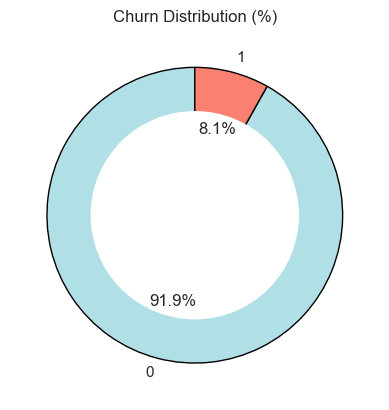

In [ ]:
# lets find out churn/non churn percentage

churn_data = (telecom_df_filtered['churn'].value_counts()/len(telecom_df) * 100)
plt.pie(churn_data, labels=churn_data.index, autopct='%1.1f%%', startangle=90, colors=['powderblue', 'salmon'], wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution (%)')
plt.show()

### As we observe that 92% of customers do not churn, there may be a class imbalance in the data.

Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped from the dataset.

In [ ]:
# Selecting all the churn phase columns in order to drop then

telecom_df_phase_cols = [col for col in telecom_df_filtered.columns if '_9' in col]
print("The columns from churn phase are:\n",telecom_df_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [ ]:
# Dropping the selected churn phase columns
telecom_df_filtered.drop(telecom_df_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_df_filtered.shape

(30001, 144)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [ ]:
telecom_df_filtered.drop(['av_rech_amt_data_6','total_rech_data_6','total_rech_amt_6','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can create new columns to define the 'good phase' variables and remove the separate columns for the 6th and 7th months.

Before proceeding to handle the remaining missing values, let's check for multicollinearity among the independent variables to understand their interdependencies.

In [ ]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_df_filtered.columns if '_6' in col]
mon_7_cols = [col for col in telecom_df_filtered.columns if '_7' in col]
mon_8_cols = [col for col in telecom_df_filtered.columns if '_8' in col]

In [ ]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_df_corr =telecom_df_filtered.corr()
telecom_df_corr.loc[:,:] = np.tril(telecom_df_corr, k=-1)
telecom_df_corr = telecom_df_corr.stack()
telecom_df_corr
telecom_df_corr[(telecom_df_corr > 0.80) | (telecom_df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.955351
isd_og_mou_8        isd_og_mou_7         0.943120
                    isd_og_mou_6         0.918187
isd_og_mou_7        isd_og_mou_6         0.915247
sachet_2g_8         total_rech_data_8    0.900629
total_ic_mou_6      loc_ic_mou_6         0.895069
total_ic_mou_8      loc_ic_mou_8         0.893149
total_ic_mou_7      loc_ic_mou_7         0.883005
std_og_t2t_mou_8    onnet_mou_8          0.860771
std_og_t2t_mou_7    onnet_mou_7          0.860381
std_og_t2t_mou_6    onnet_mou_6          0.859471
std_og_t2m_mou_7    offnet_mou_7         0.855018
std_og_t2m_mou_8    offnet_mou_8         0.851995
total_og_mou_8      std_og_mou_8         0.851063
total_og_mou_7      std_og_mou_7         0.849570
loc_ic_mou_8        loc_ic_t2m_mou_8     0.846955
std_ic_mou_8        std_ic_t2m_mou_8     0.845795
loc_ic_mou_6        loc_ic_t2m_mou_6     0.844206
loc_og_mou_8        loc_og_mou_7         0.841811
loc_ic_mou_8        loc_ic_mou_7         0.839883


In [ ]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8', 'sachet_2g_8','isd_og_mou_8','total_ic_mou_6','total_ic_mou_8',
             'total_ic_mou_7', 'std_og_t2t_mou_8','std_og_t2t_mou_7','total_og_mou_8','std_og_t2m_mou_8',
             'total_og_mou_7', 'std_ic_mou_8','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7']

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_df_filtered.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_df_filtered.shape

(30001, 123)

## Exploratory Data Analysis (EDA)

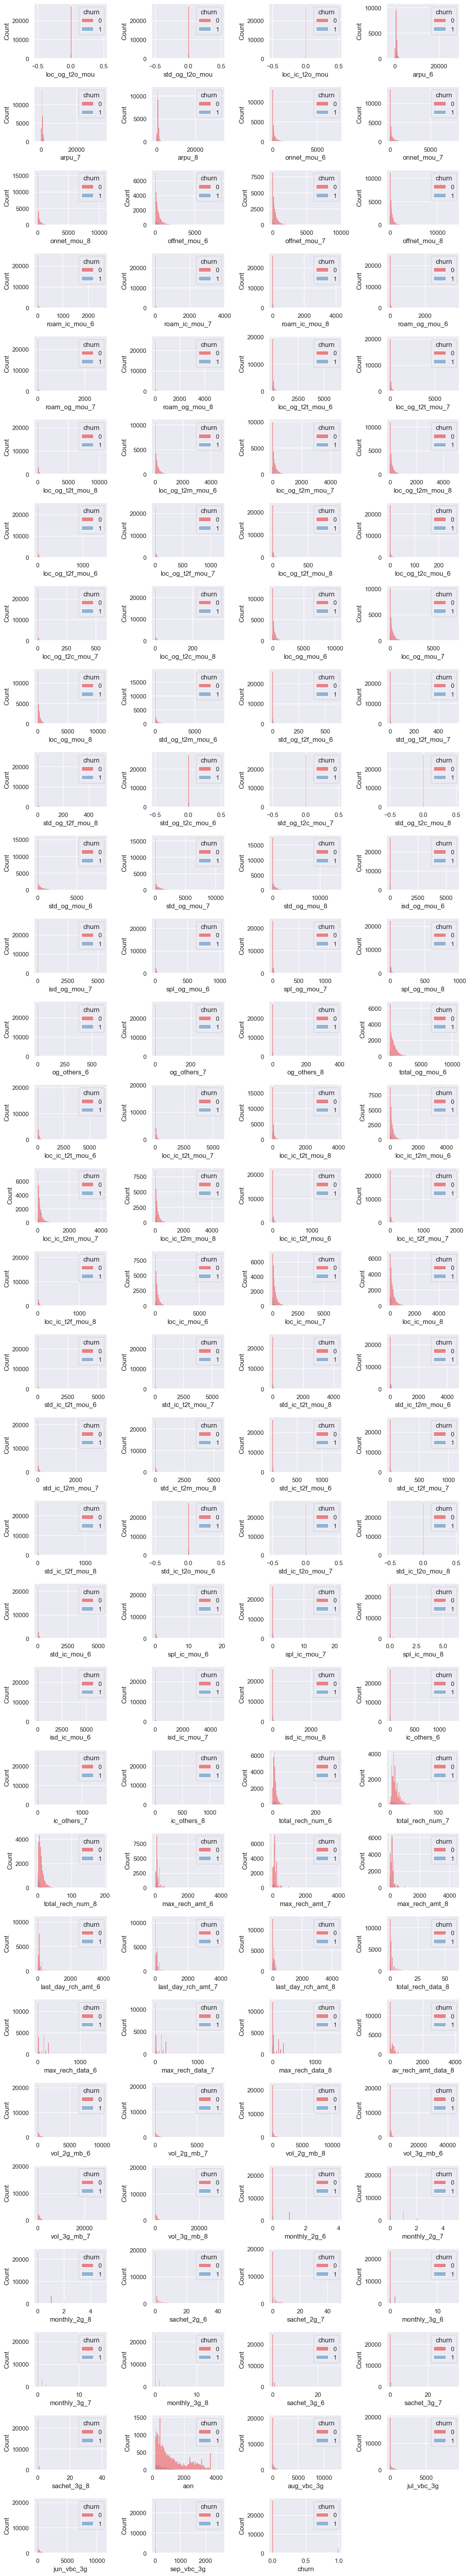

In [ ]:
## Numerical Columns

row = 31  # number of rows
col = 4  # number of columns
counter = 1  # Initializing plot counter
fig = plt.figure(figsize=(12, 65))
for i in telecom_df_filtered.columns:
    plt.subplot(row, col, counter)
    sns.histplot(data=telecom_df_filtered, x=i, hue="churn", palette="Set1", bins=100)
    counter += 1
fig.tight_layout()
plt.show()

In [ ]:
# We have column called 'aon', we can derive new variables from this to explain the data with respect to churn.

# creating a new variable 'tenure'
telecom_df_filtered['tenure'] = (telecom_df_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_df_filtered.drop('aon',axis=1, inplace=True)

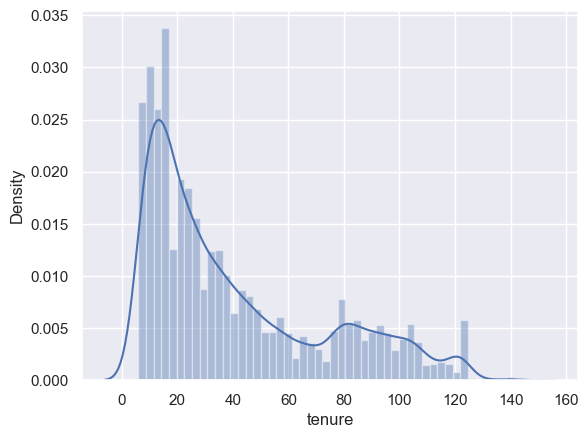

In [ ]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_df_filtered['tenure'],bins=50)
plt.show()

In [ ]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df_filtered['tenure_range'] = pd.cut(telecom_df_filtered['tenure'], tn_range, labels=tn_label)
telecom_df_filtered['tenure_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

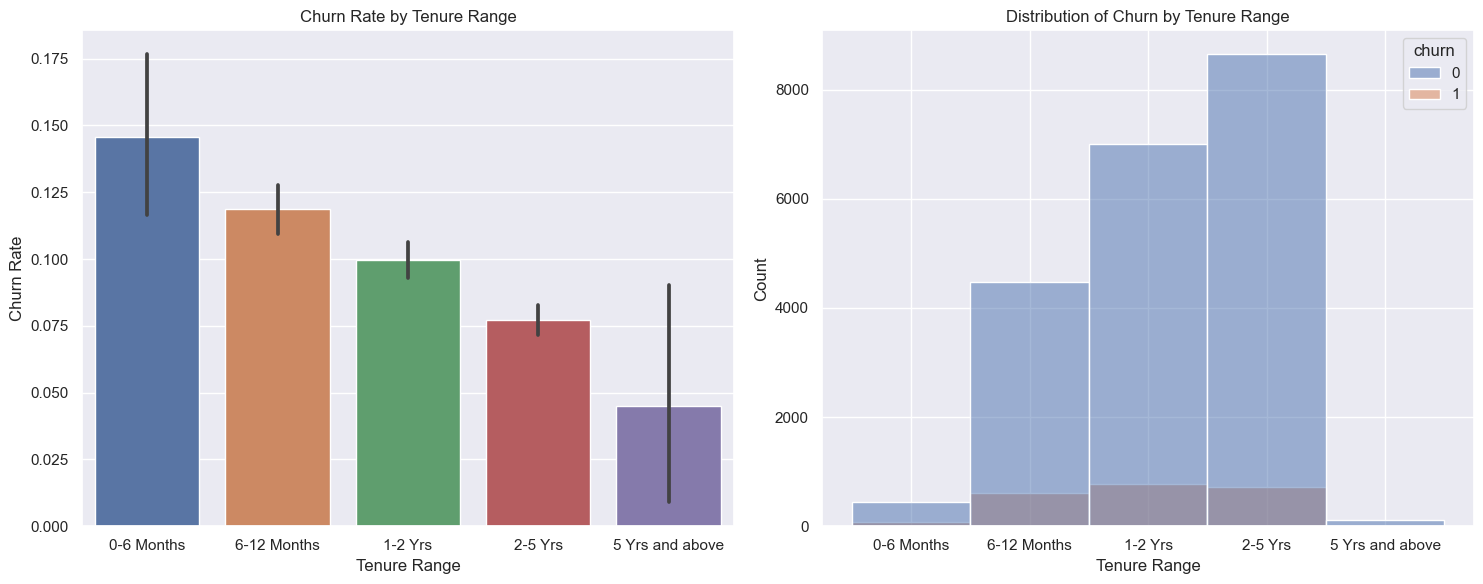

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Distribution of churn across tenure range
sns.histplot(ax=ax2, x='tenure_range', hue='churn', data=telecom_df_filtered, stat='count')
ax2.set_title("Distribution of Churn by Tenure Range")
ax2.set_xlabel("Tenure Range")
ax2.set_ylabel("Count")

# Plot 2: Barplot
sns.barplot(ax=ax1, x='tenure_range', y='churn', data=telecom_df_filtered)
ax1.set_title("Churn Rate by Tenure Range")
ax1.set_xlabel("Tenure Range")
ax1.set_ylabel("Churn Rate")
plt.tight_layout()
plt.show()

### Observations-:

**The highest churn rate occurs within the first 0-6 months, but it gradually declines as customers stay longer in the network.**

The average revenue per user during a favorable customer phase is represented by arpu_6 and arpu_7. Since we have two separate averages, let's calculate their combined average and drop the individual columns.

In [ ]:
telecom_df_filtered["avg_arpu_6_7"]= (telecom_df_filtered['arpu_6']+telecom_df_filtered['arpu_7'])/2
telecom_df_filtered['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [ ]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_df_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_df_filtered.shape

(30001, 123)

In [ ]:
telecom_df_filtered_numeric = telecom_df_filtered.select_dtypes(include=[np.number])

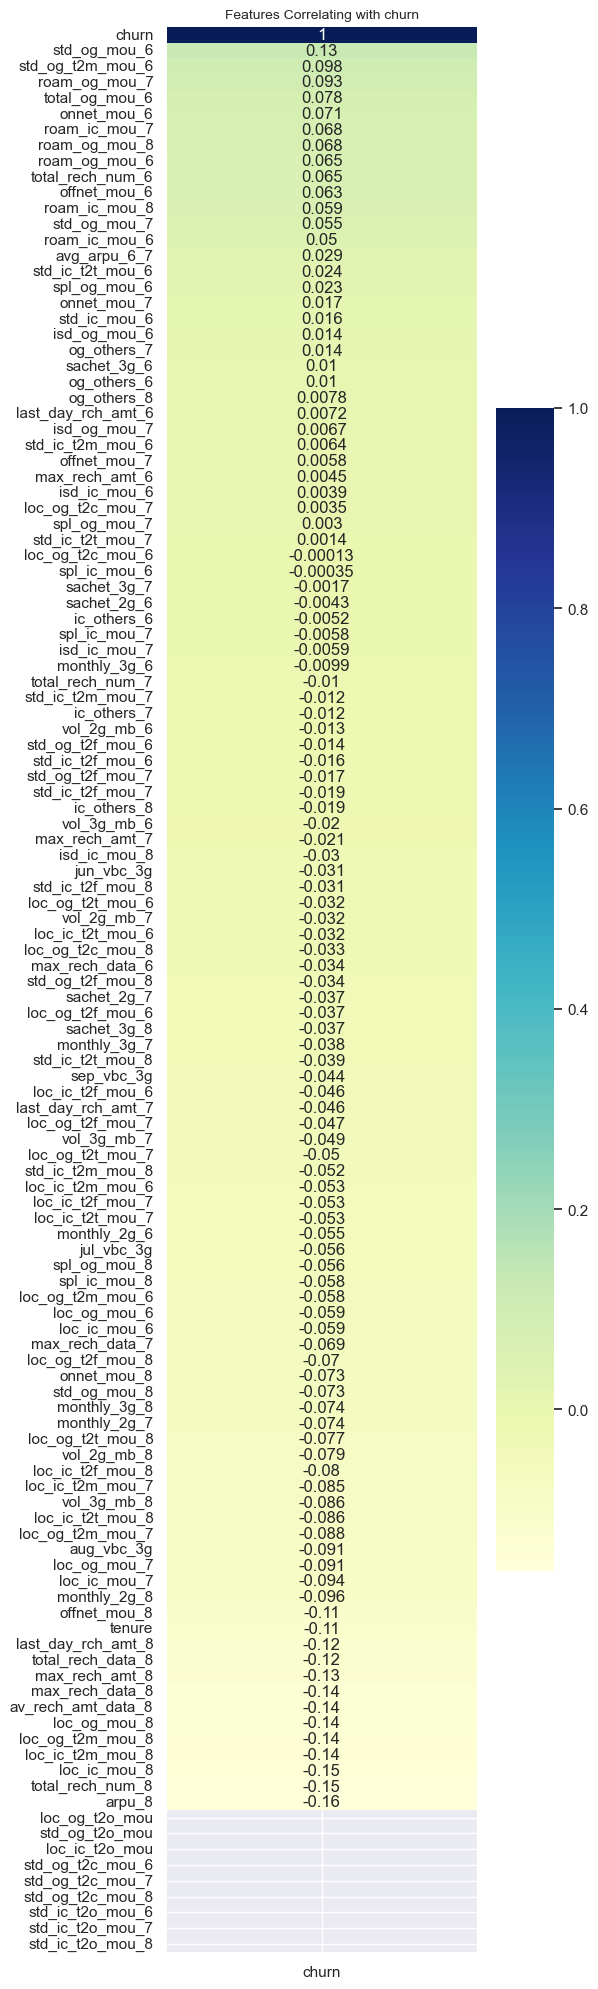

In [ ]:
# Checking Correlation between (SalePrice) with the other variable in the dataset
corr_matrix = telecom_df_filtered_numeric.corr()
churn_corr = corr_matrix[['churn']].sort_values(by='churn', ascending=False)
plt.figure(figsize=(5, 25))
heatmap_churn = sns.heatmap(churn_corr, annot=True, cmap='YlGnBu')
heatmap_churn.set_title("Features Correlating with churn", fontsize=10)
plt.show()

Average outgoing calls and calls made while roaming during the 6th and 7th months show a positive correlation with churn.

In contrast, average revenue and the number of recharges in the 8th month are negatively correlated with churn.

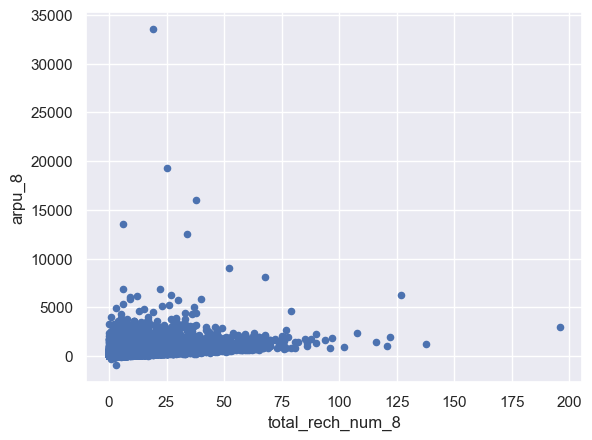

In [ ]:
# scatter plot between total recharge and avg revenue for the 8th month
telecom_df_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

[1 0]
int64
[1, 0]
Categories (2, int64): [0, 1]
category


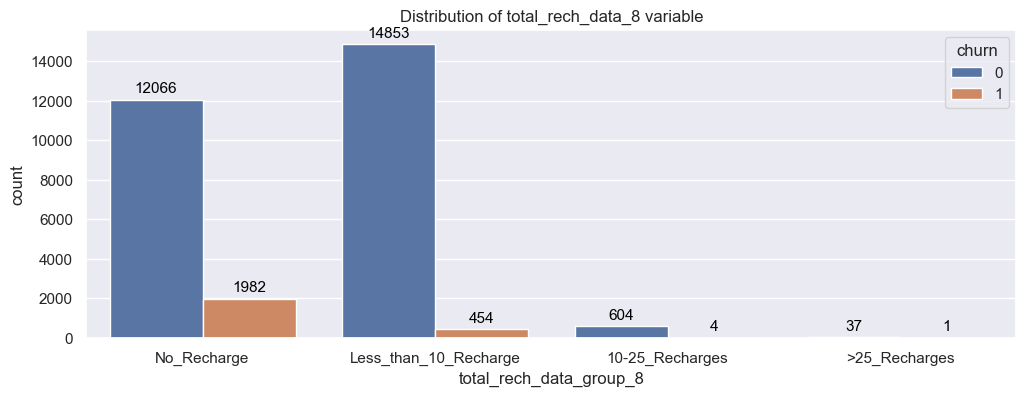

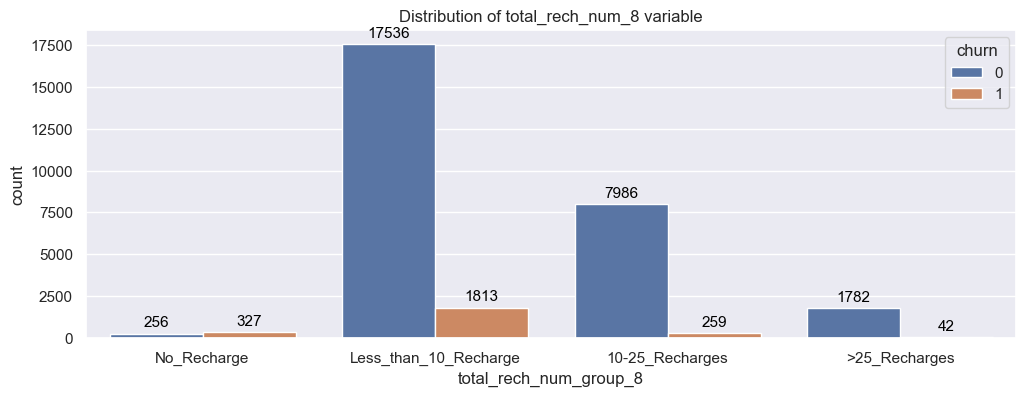

In [ ]:
# Creating categories
telecom_df_filtered['total_rech_data_group_8'] = pd.cut(telecom_df_filtered['total_rech_data_8'], [-1, 0, 10, 25, 100], labels=["No_Recharge", "Less_than_10_Recharge", "10-25_Recharges", ">25_Recharges"])
telecom_df_filtered['total_rech_num_group_8'] = pd.cut(telecom_df_filtered['total_rech_num_8'], [-1, 0, 10, 25, 1000], labels=["No_Recharge", "Less_than_10_Recharge", "10-25_Recharges", ">25_Recharges"])

print(telecom_df_filtered['churn'].unique())
print(telecom_df_filtered['churn'].dtype)

if telecom_df_filtered['churn'].dtype != 'category':
    telecom_df_filtered['churn'] = telecom_df_filtered['churn'].astype('category')

print(telecom_df_filtered['churn'].unique())
print(telecom_df_filtered['churn'].dtype)

# Plotting the results with count annotations for 'total_rech_data_group_8'
plt.figure(figsize=[12, 4])
ax = sns.countplot(data=telecom_df_filtered, x="total_rech_data_group_8", hue="churn")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of total_rech_data_8 variable")
plt.show()

# Plotting the results with count annotations for 'total_rech_num_group_8'
plt.figure(figsize=[12, 4])
ax = sns.countplot(data=telecom_df_filtered, x="total_rech_num_group_8", hue="churn")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Distribution of total_rech_num_8 variable")
plt.show()


As the number of recharge rate increases, the churn rate decreases clearly.

In [ ]:
telecom_df_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

Now, we can drop all "mou related" columns except onnet and offnet variables.

In [ ]:
telecom_df_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [ ]:
telecom_df_filtered.shape

(30001, 44)

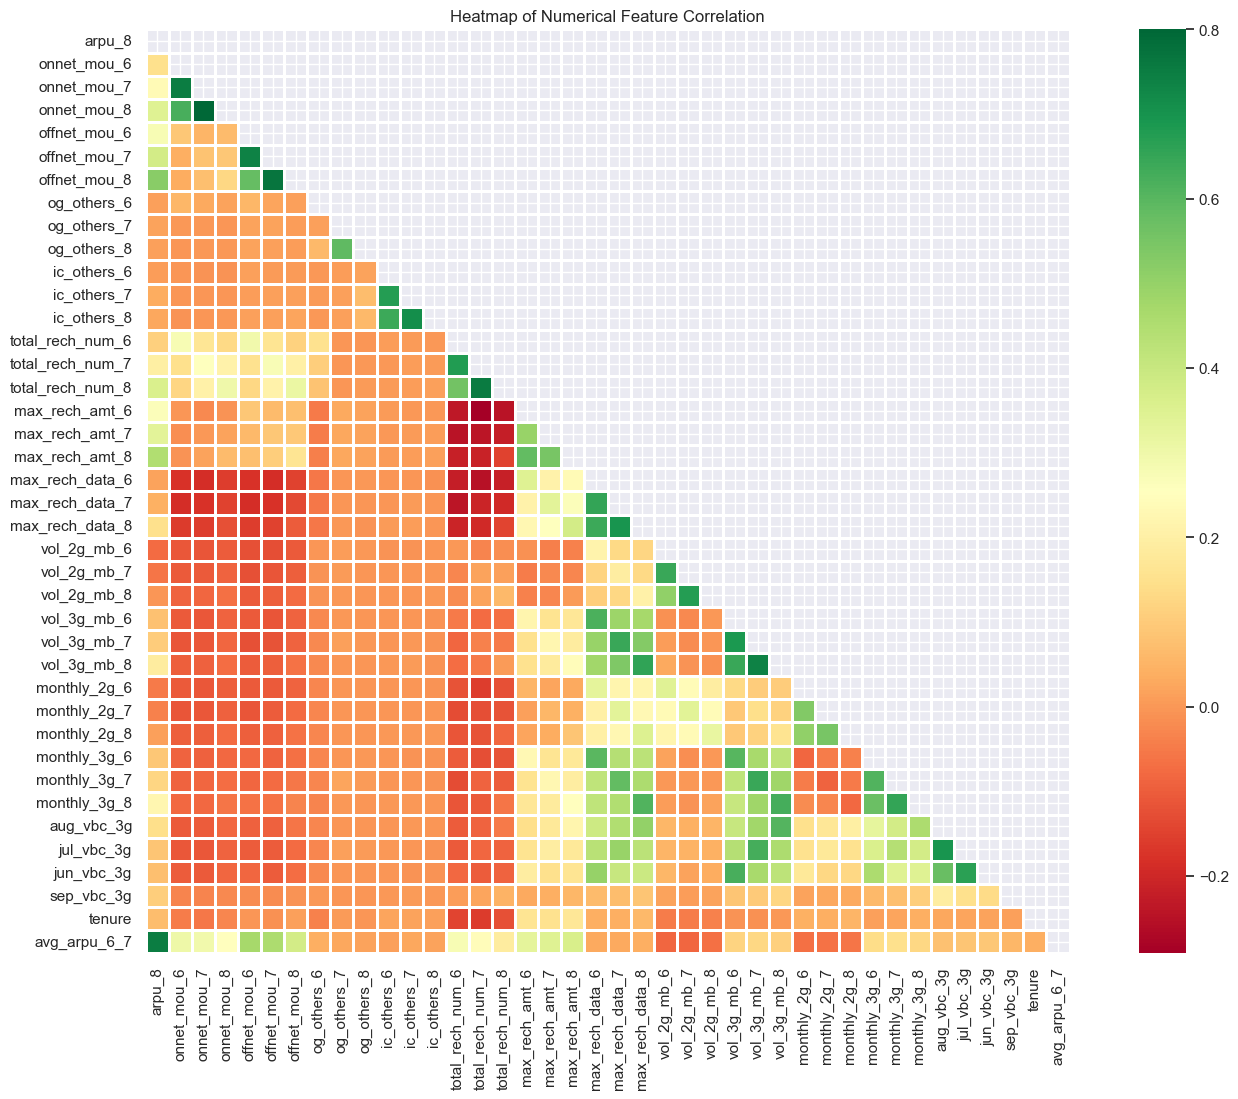

In [ ]:
# Plotting the Heatmap for numerical columns

numeric_telecom_df = telecom_df_filtered.select_dtypes(include=[np.number])
fig = plt.figure(figsize=(18, 12))
matrix = np.triu(numeric_telecom_df.corr())
sns.heatmap(numeric_telecom_df.corr(), vmax=0.8, square=True, cmap="RdYlGn", fmt=".2f", mask=matrix, linewidths=2)
plt.title('Heatmap of Numerical Feature Correlation')
plt.show()

In [ ]:
telecom_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   30001 non-null  float64 
 1   onnet_mou_6              30001 non-null  float64 
 2   onnet_mou_7              30001 non-null  float64 
 3   onnet_mou_8              30001 non-null  float64 
 4   offnet_mou_6             30001 non-null  float64 
 5   offnet_mou_7             30001 non-null  float64 
 6   offnet_mou_8             30001 non-null  float64 
 7   og_others_6              30001 non-null  float64 
 8   og_others_7              30001 non-null  float64 
 9   og_others_8              30001 non-null  float64 
 10  ic_others_6              30001 non-null  float64 
 11  ic_others_7              30001 non-null  float64 
 12  ic_others_8              30001 non-null  float64 
 13  total_rech_num_6         30001 non-null  int64   
 14  total_

In [ ]:
# Dropping unwanted columns
telecom_df_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8','tenure_range'] , axis=1, inplace=True)

In [ ]:
telecom_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   arpu_8            30001 non-null  float64 
 1   onnet_mou_6       30001 non-null  float64 
 2   onnet_mou_7       30001 non-null  float64 
 3   onnet_mou_8       30001 non-null  float64 
 4   offnet_mou_6      30001 non-null  float64 
 5   offnet_mou_7      30001 non-null  float64 
 6   offnet_mou_8      30001 non-null  float64 
 7   og_others_6       30001 non-null  float64 
 8   og_others_7       30001 non-null  float64 
 9   og_others_8       30001 non-null  float64 
 10  ic_others_6       30001 non-null  float64 
 11  ic_others_7       30001 non-null  float64 
 12  ic_others_8       30001 non-null  float64 
 13  total_rech_num_6  30001 non-null  int64   
 14  total_rech_num_7  30001 non-null  int64   
 15  total_rech_num_8  30001 non-null  int64   
 16  max_rech_amt_6    3000

In [ ]:
telecom_df_filtered.shape

(30001, 41)

In [ ]:
churn_rate = (sum(telecom_df_filtered["churn"])/len(telecom_df_filtered["churn"].index))*100
churn_rate

8.136395453484884

## Spliting Data Into Train Data and Test Data:

In [ ]:
# Splitting data into train and test dataset

X = telecom_df_filtered.drop("churn", axis = 1)
y = telecom_df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [ ]:
# print shapes of train and test sets
X_train.shape

(22500, 40)

In [ ]:
y_train.shape

(22500,)

In [ ]:
X_test.shape

(7501, 40)

In [ ]:
y_test.shape

(7501,)

### Performing scaling

In [ ]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,183.004,3.93,0.00,0.00,4.09,0.16,15.46,0.00,0.0,0.0,0.00,0.00,0.00,6,0,3,198,0,198,198.0,0.0,198.0,1916.23,0.0,2902.44,0.00,0.00,0.00,1,0,1,0,0,0,0.00,0.00,0.0,0.0,20.0,111.4590
12436,62.260,5.44,11.20,0.00,39.46,11.64,37.74,0.00,0.0,0.0,26.49,12.34,2.01,5,5,6,86,110,0,252.0,252.0,252.0,9.62,65.2,31.10,2068.61,1982.61,3087.72,0,0,0,2,2,2,955.97,1613.36,735.4,0.0,11.0,93.4050
29024,24.750,725.11,671.44,11.76,145.63,80.66,2.50,2.33,0.0,0.0,0.13,0.26,0.00,9,6,2,128,150,0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.0,10.0,523.5985
11193,422.360,17.93,37.53,23.89,526.68,831.58,671.01,0.00,0.0,0.0,0.00,10.73,0.00,39,46,32,50,47,47,17.0,0.0,0.0,62.01,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.0,28.0,487.7310
10907,2300.151,7.53,11.88,56.49,788.53,1441.28,5453.33,0.98,0.0,0.0,0.00,0.00,0.00,4,8,27,120,130,130,0.0,0.0,17.0,0.00,0.0,58.26,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.0,0.0,81.0,497.1310


In [ ]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [ ]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [ ]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
4525,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.019544,0.000000,0.015306,0.049377,0.000000,0.044504,0.127331,0.000000,0.127331,0.186297,0.000000,0.261067,0.00000,0.000000,0.0000,0.25,0.0,0.2,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.101449,0.026756
12436,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.000000,0.0,0.0,0.019708,0.008249,0.001661,0.016287,0.036232,0.030612,0.021446,0.027431,0.000000,0.162058,0.162058,0.162058,0.000935,0.008281,0.002797,0.04523,0.070445,0.1028,0.00,0.0,0.0,0.142857,0.125,0.125,0.074013,0.176023,0.065859,0.0,0.036232,0.026196
29024,0.028141,0.103423,0.090600,0.001639,0.020916,0.008344,0.000178,0.033045,0.0,0.0,0.000097,0.000174,0.000000,0.029316,0.043478,0.010204,0.031920,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.028986,0.039560
11193,0.039669,0.002557,0.005064,0.003330,0.075646,0.086021,0.047904,0.000000,0.0,0.0,0.000000,0.007173,0.000000,0.127036,0.333333,0.163265,0.012469,0.011721,0.010564,0.010932,0.000000,0.000000,0.006029,0.000000,0.000000,0.00000,0.000000,0.0000,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.159420,0.038446
10907,0.094115,0.001074,0.001603,0.007874,0.113255,0.149091,0.389319,0.013899,0.0,0.0,0.000000,0.000000,0.000000,0.013029,0.057971,0.137755,0.029925,0.032419,0.029220,0.000000,0.000000,0.010932,0.000000,0.000000,0.005240,0.00000,0.000000,0.0000,0.00,0.0,0.0,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.0,0.543478,0.038738


As there are many variables we will start the process of dropping variables after doing the RFE.

### Data Modeling and Model Evaluation and Preparing Model for Predictor variables selection:

### Handling Data Imbalance:

Using SMOTE method, we can balance the data with respect to churn variable and proceed further

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [ ]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (41338, 40)
Dimension of y_train_sm Shape: (41338,)


### Logistic Regression:

In [ ]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41297
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Oct 2024   Deviance:                       38532.
Time:                        20:49:44   Pearson chi2:                 6.52e+09
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8671      0.057     15.132      0.000       0.755       0.979
arpu_8             -25.2014      2.938     -8.577      0.000     -30.960     -19.443
onnet_mou_6          1.0720      0.334      3.209      0.001       0.417       1.727
onnet_mou_7          2.1999      0.467      4.713      0.000       1.285       3.115
onnet_mou_8         -4.8375      0.518     -9.343      0.000      -5.852      -3.823
offnet_mou_6         0.6236      0.333      1.875      0.061      -0.028       1.276
offnet_mou_7         6.1061      0.608     10.050      0.000       4.915       7.297
offnet_mou_8       -25.6537      1.205    -21.293      0.000     -28.015     -23.292
og_others_6         -2.7830      0.503     -5.529      0.000      -3.770      -1.796
og_others_7         -1.5599      4.106     -0.380      0.704      -9.607       6.487
og_others_8      -3152.0962   1363.044     -2.313      0.021   -5823.614    -480.579
ic_others_6        -19.5205      5.166     -3.779      0.000     -29.645      -9.396
ic_others_7          1.1980      2.707      0.443      0.658      -4.107       6.503
ic_others_8        -29.8068      5.017     -5.941      0.000     -39.641     -19.973
total_rech_num_6     7.2283      0.763      9.478      0.000       5.734       8.723
total_rech_num_7     3.7792      0.410      9.219      0.000       2.976       4.583
total_rech_num_8   -22.8991      0.733    -31.225      0.000     -24.336     -21.462
max_rech_amt_6       1.6965      0.422      4.017      0.000       0.869       2.524
max_rech_amt_7       2.5659      0.348      7.371      0.000       1.884       3.248
max_rech_amt_8      -4.2192      0.553     -7.628      0.000      -5.303      -3.135
max_rech_data_6      1.3971      0.348      4.009      0.000       0.714       2.080
max_rech_data_7      2.5072      0.381      6.573      0.000       1.760       3.255
max_rech_data_8     -5.1238      0.493    -10.386      0.000      -6.091      -4.157
vol_2g_mb_6          1.5301      0.644      2.378      0.017       0.269       2.791
vol_2g_mb_7          3.1277      0.579      5.404      0.000       1.993       4.262
vol_2g_mb_8        -21.9339      1.413    -15.522      0.000     -24.704     -19.164
vol_3g_mb_6          4.8699      1.578      3.086      0.002       1.777       7.963
vol_3g_mb_7          0.8724      1.138      0.766      0.443      -1.358       3.103
vol_3g_mb_8         -5.1097      1.400     -3.650      0.000      -7.853      -2.366
monthly_2g_6        -0.8246      0.184     -4.473      0.000      -1.186      -0.463
monthly_2g_7        -2.8769      0.261    -11.026      0.000      -3.388      -2.365
monthly_2g_8        -3.4510      0.381     -9.067      0.000      -4.197      -2.705
monthly_3g_6         0.1032      0.588      0.175      0.861      -1.049       1.256
monthly_3g_7        -4.

### Logistic Regression using Feature Selection (RFE method):

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
rfe.support_

array([ True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False,  True])

In [ ]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_8',
       'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'monthly_2g_8', 'monthly_3g_7', 'aug_vbc_3g', 'sep_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [ ]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('og_others_6', False, 6),
 ('og_others_7', False, 19),
 ('og_others_8', False, 18),
 ('ic_others_6', False, 11),
 ('ic_others_7', False, 12),
 ('ic_others_8', True, 1),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 7),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 10),
 ('max_rech_data_7', True, 1),
 ('max_rech_data_8', True, 1),
 ('vol_2g_mb_6', False, 17),
 ('vol_2g_mb_7', False, 14),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', True, 1),
 ('vol_3g_mb_7', False, 15),
 ('vol_3g_mb_8', False, 3),
 ('monthly_2g_6', False, 16),
 ('monthly_2g_7', False, 2),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_6', False, 13),
 ('monthly_3g_7', True, 1),
 ('monthly_3g_8', False, 9),
 ('aug_vbc_3g',

### Assessing the model with StatsModels:

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19928.
Date:                Tue, 08 Oct 2024   Deviance:                       39855.
Time:                        20:49:59   Pearson chi2:                 1.09e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3444
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5596      0.064      8.745      0.000       0.434       0.685
arpu_8             -30.5447      2.871    -10.639      0.000     -36.172     -24.918
onnet_mou_7          3.0398      0.397      7.657      0.000       2.262       3.818
onnet_mou_8         -4.4777      0.512     -8.741      0.000      -5.482      -3.474
offnet_mou_7         6.5538      0.531     12.353      0.000       5.514       7.594
offnet_mou_8       -26.2489      1.200    -21.873      0.000     -28.601     -23.897
ic_others_8        -34.7079      4.861     -7.140      0.000     -44.235     -25.181
total_rech_num_6     7.8401      0.676     11.606      0.000       6.516       9.164
total_rech_num_7     3.8393      0.369     10.405      0.000       3.116       4.563
total_rech_num_8   -23.2446      0.724    -32.098      0.000     -24.664     -21.825
max_rech_amt_6       1.9560      0.405      4.835      0.000       1.163       2.749
max_rech_amt_8      -5.0986      0.555     -9.193      0.000      -6.186      -4.012
max_rech_data_7      2.7569      0.279      9.867      0.000       2.209       3.305
max_rech_data_8     -4.7263      0.330    -14.338      0.000      -5.372      -4.080
vol_2g_mb_8        -16.7571      1.147    -14.610      0.000     -19.005     -14.509
vol_3g_mb_6          4.9507      0.888      5.572      0.000       3.209       6.692
monthly_2g_8        -5.8270      0.323    -18.039      0.000      -6.460      -5.194
monthly_3g_7        -2.4253      0.530     -4.578      0.000      -3.464      -1.387
aug_vbc_3g         -13.7137      0.939    -14.603      0.000     -15.554     -11.873
sep_vbc_3g         -53.7668      4.231    -12.708      0.000     -62.060     -45.474
avg_arpu_6_7        35.1313      2.406     14.604      0.000      30.416      39.846
====================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([2.46312870e-03, 1.99100041e-01, 8.36153675e-01, 1.76037334e-01,
       1.61850107e-06, 2.71364760e-01, 7.81347075e-02, 8.93794720e-06,
       6.08212158e-01, 1.63292845e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities:

In [ ]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.002463
1,0,0.199100
2,1,0.836154
3,0,0.176037
4,0,0.000002


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [ ]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.002463,0
1,0,0.199100,0
2,1,0.836154,1
3,0,0.176037,0
4,0,0.000002,0


In [ ]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[16023  4646]
 [ 3879 16790]]


In [ ]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7937732836615221


### Check for the VIF values of the feature variables:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,40.78
0,arpu_8,37.23
7,total_rech_num_7,7.14
8,total_rech_num_8,5.24
6,total_rech_num_6,5.20
3,offnet_mou_7,4.22
4,offnet_mou_8,3.91
1,onnet_mou_7,3.58
2,onnet_mou_8,3.41
9,max_rech_amt_6,3.27


#### Metrics beyond simply accuracy:

In [ ]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [ ]:
# Calculating Sensitivity
sensitivity = TP/(TP+FN)
print('Model sensitivity :', round(sensitivity*100, 4), '%')

# Calculating Specificity
specificity = TN/(TN+FP)
print('Model specificity is', round(specificity*100 ,4) , '%')

# Calculating false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ", round(FP/ float(TN+FP), 4))

#Calculating Precision
Precision_rate = TP / (TP + FP)
print ('Precision rate : ', round(Precision_rate*100 , 4), '%')

# Negative predictive value
print ("True Negative Prediction Rate = ", round(TN / float(TN+ FN),4))

Model sensitivity : 81.2328 %
Model specificity is 77.5219 %
False Positive Rate =  0.2248
Precision rate :  78.3262 %
True Negative Prediction Rate =  0.8051


#### Plotting the ROC Curve:

In [ ]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

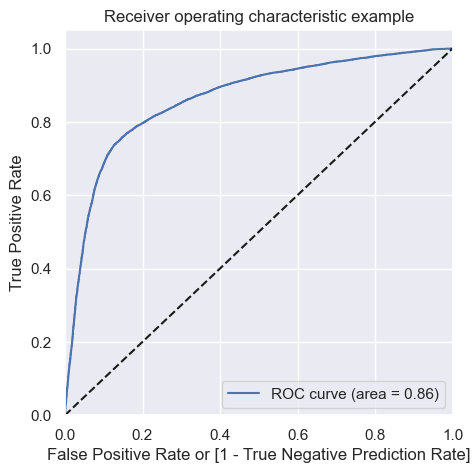

In [ ]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [ ]:
# creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002463,0,1,0,0,0,0,0,0,0,0,0
1,0,0.199100,0,1,1,0,0,0,0,0,0,0,0
2,1,0.836154,1,1,1,1,1,1,1,1,1,1,0
3,0,0.176037,0,1,1,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.609899     0.971842     0.247956
0.2          0.2  0.673158     0.944748     0.401568
0.3          0.3  0.725434     0.914413     0.536456
0.4          0.4  0.766776     0.870482     0.663070
0.5          0.5  0.793773     0.812328     0.775219
0.6          0.6  0.804490     0.747641     0.861338
0.7          0.7  0.774300     0.628284     0.920315
0.8          0.8  0.671489     0.379506     0.963472
0.9          0.9  0.560622     0.132372     0.988872


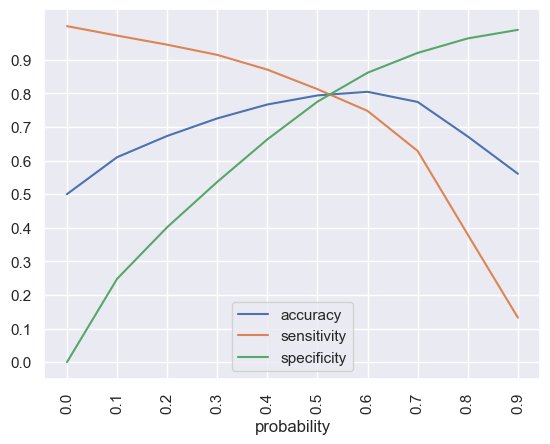

In [ ]:
custom_bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(custom_bins,rotation=90)
plt.yticks(custom_bins)
plt.grid(True)
plt.show()

Initially, we set the optimal classification point at 0.52

From the graph above, it's clear that the optimal cutoff is slightly above 0.5 but below 0.6. Let's fine-tune it further within this range.

In [ ]:
# Let's create columns with refined probability cutoffs
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.002463,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.199100,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836154,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3,0,0.176037,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.793773     0.812328     0.775219
0.51         0.51  0.795733     0.805651     0.785815
0.52         0.52  0.797329     0.799265     0.795394
0.53         0.53  0.798829     0.793217     0.804441
0.54         0.54  0.801224     0.788379     0.814069
0.55         0.55  0.801974     0.781750     0.822197
0.56         0.56  0.803038     0.775171     0.830906
0.57         0.57  0.804320     0.769123     0.839518
0.58         0.58  0.804683     0.761914     0.847453
0.59         0.59  0.804901     0.755382     0.854420


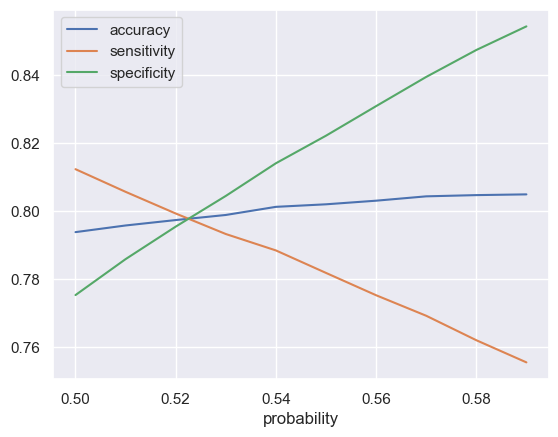

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [ ]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.002463,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.199100,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.836154,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,0,0.176037,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.7988291644491751


In [ ]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16627  4042]
 [ 4274 16395]]


In [ ]:
TP2 = confusion2[1,1] # true positive
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7932168948667085
Specificity =  0.8044414340316416
False Positive Rate =  0.1955585659683584
Precision =  0.8022214610755003
True Negative Prediction Rate =  0.7955121764508876


#### Precision and recall tradeoff:

In [ ]:
from sklearn.metrics import precision_recall_curve

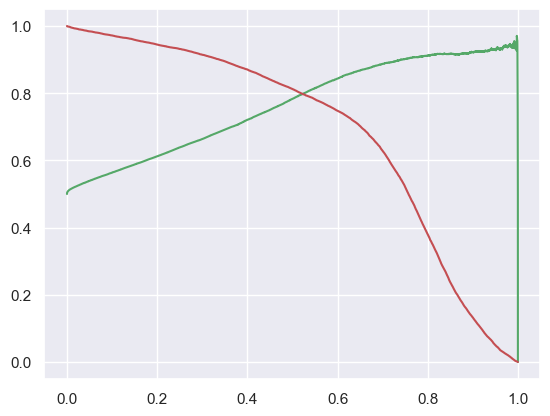

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

Transforming and feature selection for test data

In [ ]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tenure,avg_arpu_6_7
16575,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.062843,0.062843,0.056642,0.162058,0.162058,0.162058,0.001785,0.006578,0.002816,0.163451,0.159254,0.092118,0.0,0.0,0.0,0.428571,0.3750,0.1875,0.160223,0.217613,0.412013,0.000000,0.094203,0.049051
10086,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.000000,0.0,0.0,0.000439,0.000201,0.0,0.013029,0.014493,0.015306,0.074813,0.087282,0.089908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.268116,0.035274
18646,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.036232,0.025510,0.124688,0.084539,0.112385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000181,0.000000,0.565217,0.034930
10925,0.027401,0.000000,0.000000,0.000367,0.001958,0.000000,0.000843,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.016287,0.028986,0.010204,0.062843,0.062843,0.000000,0.162058,0.162058,0.000000,0.003546,0.000170,0.000000,0.079117,0.037413,0.000000,0.0,0.0,0.0,0.214286,0.0625,0.0000,0.000000,0.000000,0.092829,0.000000,0.036232,0.033257
24503,0.044181,0.000548,0.013906,0.014724,0.113417,0.107065,0.052672,0.087789,0.0,0.0,0.001518,0.000000,0.0,0.052117,0.173913,0.091837,0.012469,0.012469,0.009890,0.000000,0.010932,0.000000,0.000000,0.000434,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.069046,0.224638,0.041169


In [ ]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_8,max_rech_data_7,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_6,monthly_2g_8,monthly_3g_7,aug_vbc_3g,sep_vbc_3g,avg_arpu_6_7
16575,0.046455,0.001074,0.000000,0.011408,0.000000,0.0,0.022801,0.072464,0.015306,0.062843,0.056642,0.162058,0.162058,0.002816,0.163451,0.0,0.3750,0.160223,0.000000,0.049051
10086,0.044771,0.067489,0.068323,0.007710,0.005207,0.0,0.013029,0.014493,0.015306,0.074813,0.089908,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.035274
18646,0.042529,0.114743,0.149345,0.002716,0.001079,0.0,0.016287,0.036232,0.025510,0.124688,0.112385,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.034930
10925,0.027401,0.000000,0.000367,0.000000,0.000843,0.0,0.016287,0.028986,0.010204,0.062843,0.000000,0.162058,0.000000,0.000000,0.079117,0.0,0.0625,0.000000,0.000000,0.033257
24503,0.044181,0.013906,0.014724,0.107065,0.052672,0.0,0.052117,0.173913,0.091837,0.012469,0.009890,0.010932,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.069046,0.041169


In [ ]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16575    0.143479
10086    0.433949
18646    0.377983
10925    0.842744
24503    0.008043
10584    0.215312
2654     0.206061
23565    0.746925
5876     0.608501
19698    0.015450
dtype: float64


In [ ]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
16575,0.143479
10086,0.433949
18646,0.377983
10925,0.842744
24503,0.008043


In [ ]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
16575,0
10086,0
18646,0
10925,1
24503,0


In [ ]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
16575,0,0.143479
10086,0,0.433949
18646,0,0.377983
10925,1,0.842744
24503,0,0.008043


In [ ]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
16575,0,0.143479,0
10086,0,0.433949,0
18646,0,0.377983,0
10925,1,0.842744,1
24503,0,0.008043,0


In [ ]:
# Checking overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8104252766297827

## Metrics Evaluation:

In [ ]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5609 1282]
 [ 140  470]]


In [ ]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [ ]:
# Calculating Sensitivity
print("Sensitivity = ", round(TP3 / float(TP3+FN3),4))

# Calculating Specificity
print("Specificity = ", round(TN3 / float(TN3+FP3),4))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",round(FP3/ float(TN3+FP3), 4))

# positive predictive value
print ("Precision = ",round(TP3 / float(TP3+FP3),4))

# Negative predictive value
print ("True Negative Prediction Rate = ",round(TN3 / float(TN3+ FN3),4))

Sensitivity =  0.7705
Specificity =  0.814
False Positive Rate =  0.186
Precision =  0.2683
True Negative Prediction Rate =  0.9756


#### Explaining the results

In [ ]:
print("Accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("Sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a Sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

Accuracy of the predicted model is:  81.0 %
Sensitivity of the predicted model is:  77.0 %

As the model created is based on a Sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



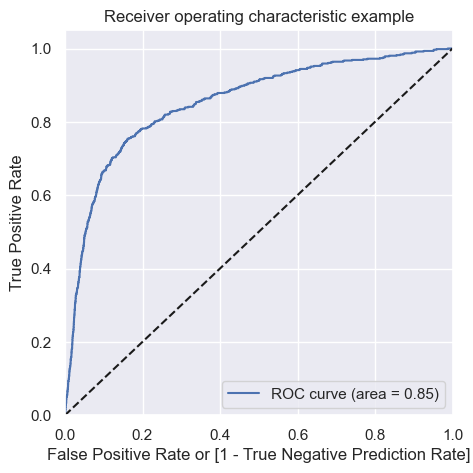

In [ ]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

### The AUC score for train dataset is 0.86 and the test dataset is 0.85.

### This model can be considered as a good model.

### PCA:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

(24000, 40)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
pca.components_

array([[ 4.72029970e-02, -4.45900121e-02, -4.79398004e-02, ...,
         4.16107639e-03, -7.53971167e-05,  3.72097081e-02],
       [ 4.27156789e-01,  2.21480420e-01,  2.66437211e-01, ...,
         8.53621231e-04,  3.93561049e-04,  3.83160444e-01],
       [-2.27887517e-02,  4.67351063e-01,  5.28643309e-01, ...,
        -1.27539938e-03, -2.07145439e-03, -1.02944756e-02],
       ...,
       [-1.34885738e-04, -1.42956794e-05, -2.35428998e-05, ...,
        -1.30206773e-04,  6.01162936e-05,  1.39407373e-04],
       [ 5.61451996e-05,  5.43339382e-06, -6.63232999e-06, ...,
         5.50472348e-05,  3.11842916e-05, -4.67213499e-05],
       [ 1.71841386e-04,  2.45626056e-05,  2.34943378e-05, ...,
         1.37704319e-04,  3.03714035e-05, -1.67616036e-04]])

#### Analysing the explained variance ratio

In [ ]:
pca.explained_variance_ratio_

array([4.23284613e-01, 1.50632992e-01, 9.41700877e-02, 6.20924590e-02,
       4.71778945e-02, 4.63575851e-02, 3.78120997e-02, 3.46933804e-02,
       2.25848020e-02, 1.36159085e-02, 1.02111561e-02, 9.45038734e-03,
       8.78227409e-03, 8.54760280e-03, 6.60256673e-03, 6.34517610e-03,
       5.59532196e-03, 3.26230830e-03, 2.85303050e-03, 2.09132867e-03,
       2.00508637e-03, 5.72574453e-04, 4.94440573e-04, 4.13760693e-04,
       1.79900658e-04, 1.05547642e-04, 2.40008449e-05, 1.50661242e-05,
       1.14591426e-05, 4.73005136e-06, 3.69305879e-06, 3.24495922e-06,
       2.61879929e-06, 7.06184376e-07, 9.55106259e-08, 3.62799168e-08,
       2.32374366e-08, 2.01220654e-08, 1.16566649e-08, 9.78145528e-09])

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

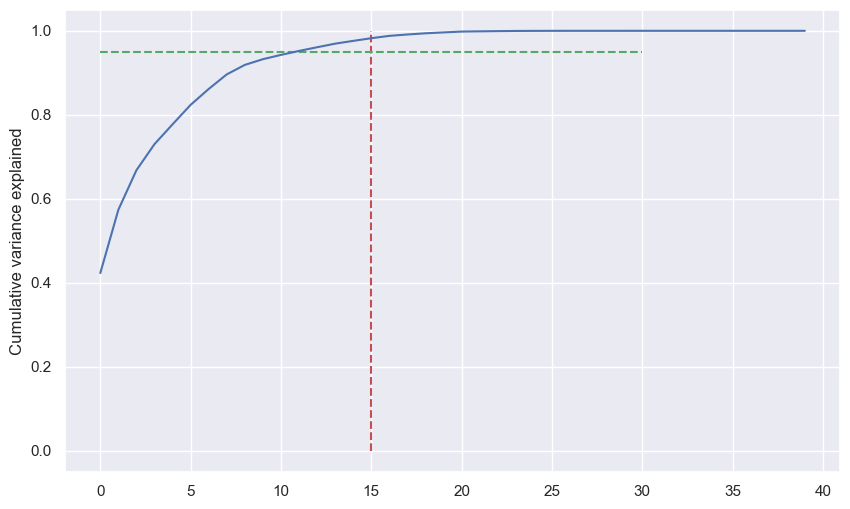

In [ ]:
fig = plt.figure(figsize=[10,6])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### We can use IncrementalPCA for better results

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

(24000, 16)

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

(16, 16)

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 16)

#### Applying logistic regression on the Principal components

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

##### Confusion matrix, Sensitivity and Specificity:

In [ ]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[5507   27]
 [ 418   49]]


In [ ]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9258456923846026
Sensitivity:- 0.10492505353319058
Specificity:- 0.9951210697506324


### Making predictions on the train set

In [ ]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.83'

#### Confusion matrix, Sensitivity and Specificity:

In [ ]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[21877   149]
 [ 1801   173]]


In [ ]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.91875
Sensitivity:- 0.08763931104356636
Specificity:- 0.9932352674112412


## Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107774,0.004455,0.001511,0.000617,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
1,0.123394,0.007574,0.001461,0.000173,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
2,0.083119,0.005829,0.000958,0.000031,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
3,0.089790,0.010079,0.001351,0.000616,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3
4,0.099550,0.008519,0.001203,0.000409,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.91775,0.000083,3


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.174196,0.003250,0.001281,0.000568,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
41,0.171968,0.004968,0.001880,0.001513,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.917667,0.918000,0.919333,0.917167,0.918042,0.000803,1
0,0.107774,0.004455,0.001511,0.000617,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
1,0.123394,0.007574,0.001461,0.000173,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3
2,0.083119,0.005829,0.000958,0.000031,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.917833,0.917833,0.917667,0.917667,0.917750,0.000083,3


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [ ]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10,
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [ ]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.9317916666666667
Train Confusion Matrix:
[[21687   339]
 [ 1298   676]]
--------------------------------------------------
Test Accuracy : 0.9213464422596234
Test Confusion Matrix:
[[5418  116]
 [ 356  111]]


## Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [ ]:
rf.oob_score_

0.9182916666666666

In [ ]:
from sklearn.metrics import RocCurveDisplay

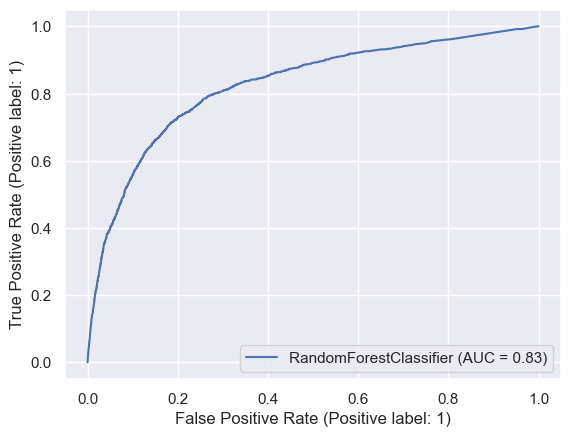

In [ ]:
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9177499999999998

In [ ]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [ ]:
evaluate_model(rfc_model)

Train Accuracy : 0.9178333333333333
Train Confusion Matrix:
[[22026     0]
 [ 1972     2]]
--------------------------------------------------
Test Accuracy : 0.9221796367272121
Test Confusion Matrix:
[[5534    0]
 [ 467    0]]


In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.3,
          'max_depth': 5,
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=5, n_estimators=200)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5}, ...)

### Identifying important churn indicators

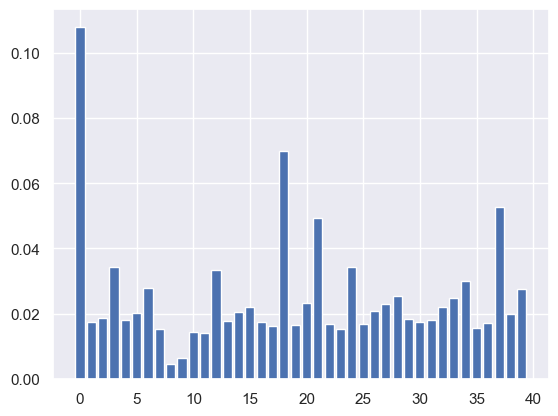

In [ ]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

#### Note:

The best hyperparameters achieved an accuracy of 91%, which is only slightly lower than the original Random Forest model's accuracy of 92%

###   Key Observations and Conclusion

Based on accuracy as a performance measure, Random Forest is the most effective model for predicting churn. Incoming calls, whether from local same operator mobile, other operator mobile, fixed lines, STD, or special calls, play a critical role in understanding the likelihood of churn. Therefore, telecom operators should pay special attention to incoming call data and consider offering special promotions to customers with declining incoming call volumes.


After cleaning the data, we applied three main models with variations to identify the best-performing one:

#### Logistic Regression:

Logistic Regression with RFE

Logistic Regression with PCA

Random Forest

##### For each model, the performance summary is as follows:

#### Logistic Regression:

Train Accuracy: ~79%

Test Accuracy: ~80%

#### Logistic Regression with PCA:

Train Accuracy: ~91.8%

Test Accuracy: ~92.5%

#### Decision Tree with PCA:

Train Accuracy: ~93.1%

Test Accuracy: ~92.1%

#### Random Forest with PCA:

Train Accuracy: ~91.8%

Test Accuracy: ~92.2%

### Business Recommendations

- Customers with fewer than 4 years of tenure are more prone to churn, and the company should focus more on that segment by rolling out new strategies/schemes to them.

- Although fewer high-value customers are leaving, no new high-value customers have been added in the previous six months, which is alarming and should be addressed by the organization.

- Local Outgoing calls to landline, fixedline, mobile, and call centers are a significant indicator of churn behavior.

- Average revenue per user appears to be the most relevant factor in predicting churn rates.